# Phase 1: Importation des bibliotheques necessaies


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Phase 2: Exploratory data analysis


In [2]:
#importation du dataset
df = pd.read_csv("music_genre.csv/music_genre.csv")

In [3]:
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [4]:
df.shape

(50005, 18)

<AxesSubplot:ylabel='None'>

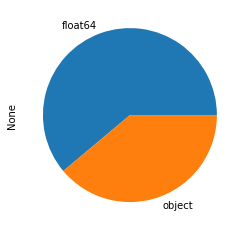

In [5]:
df.dtypes.value_counts().plot.pie()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

<AxesSubplot:>

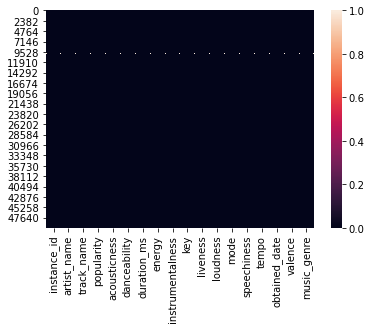

In [7]:
#afficher ou sont les valeur nan dans le dataset
sns.heatmap(df.isna())

In [8]:
df.isnull().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [9]:
df.isna().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [10]:
# elemination des columns unitils
df = df.drop('instance_id', axis=1)
df = df.drop('artist_name', axis=1)
df = df.drop('track_name', axis=1)
df = df.drop('obtained_date', axis=1)
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [11]:
#examen de la colonne target pour voir si les classes sont equilibré
df["music_genre"].value_counts()

Jazz           5000
Alternative    5000
Rap            5000
Rock           5000
Electronic     5000
Classical      5000
Hip-Hop        5000
Blues          5000
Country        5000
Anime          5000
Name: music_genre, dtype: int64

In [12]:
target = df["music_genre"]

In [13]:
#passer aux variables
df["key"].value_counts()

G     5727
C     5522
C#    5405
D     5265
A     4825
F     4341
B     3789
E     3760
A#    3356
G#    3319
F#    3101
D#    1590
Name: key, dtype: int64

In [16]:
df["mode"].value_counts()

Major    32099
Minor    17901
Name: mode, dtype: int64

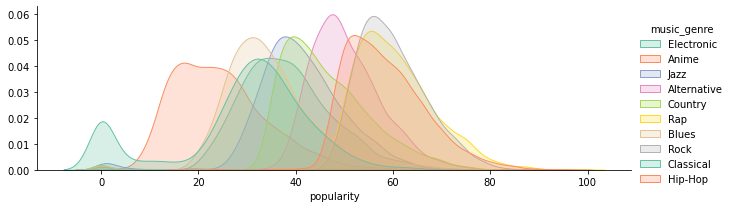

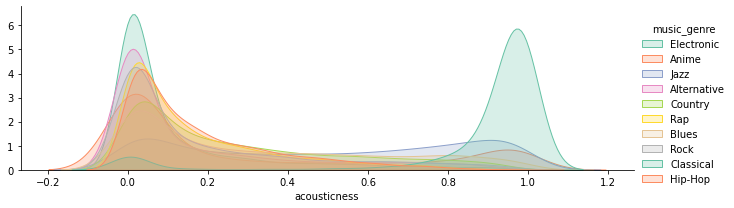

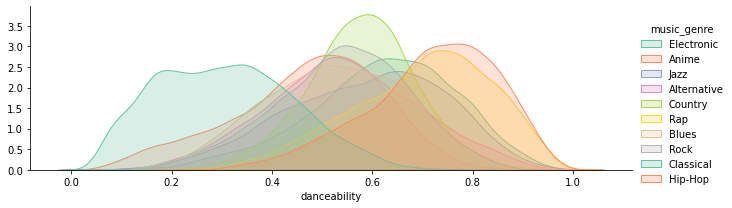

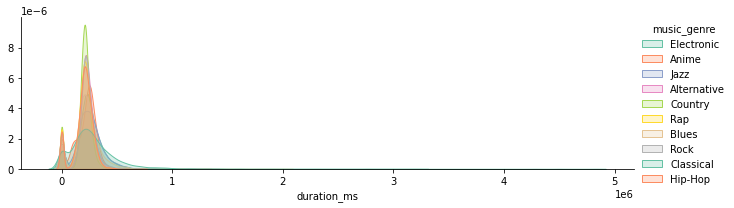

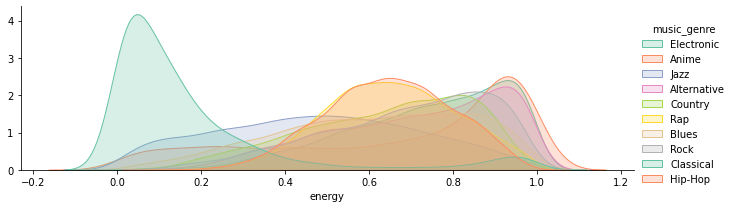

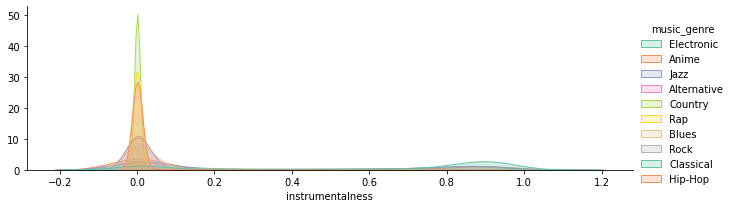

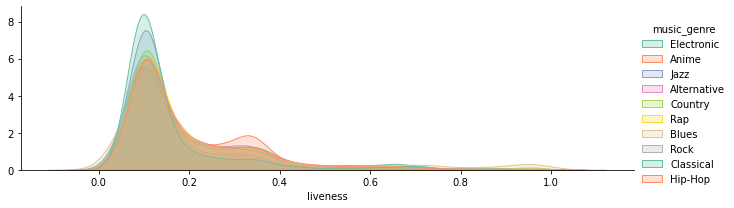

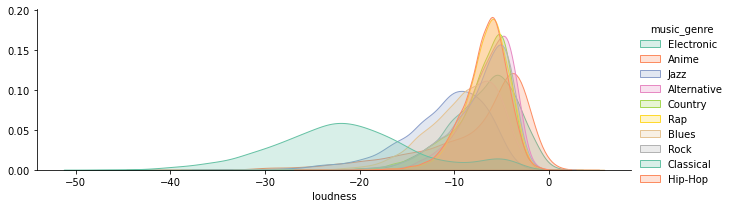

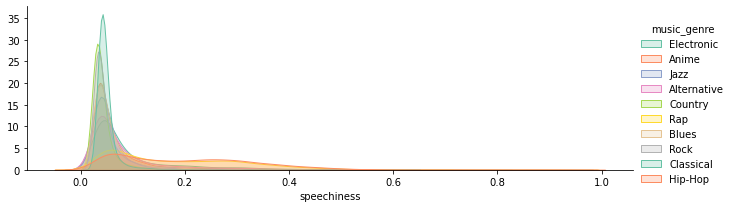

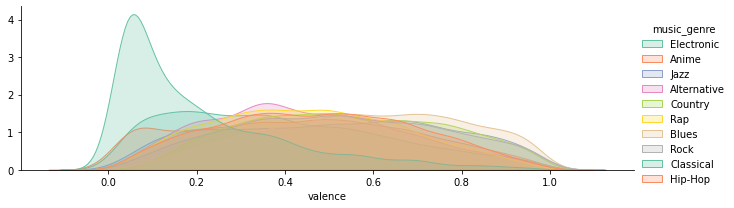

In [18]:
import warnings
warnings.filterwarnings('ignore')
for col in df.select_dtypes('float'):
    fig = sns.FacetGrid(df, hue="music_genre", aspect=3, palette="Set2") # aspect=3 permet d'allonger le graphique
    fig.map(sns.kdeplot, col, shade=True)
    fig.add_legend()

In [19]:
Xfloat = df[["popularity", "acousticness", "danceability","duration_ms","energy", "instrumentalness", "liveness", "loudness",  "speechiness", "tempo", "valence"]]
xobject = df[["key", "mode"]]

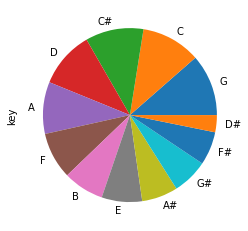

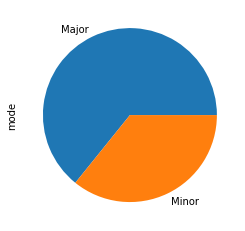

In [20]:
for col in xobject.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

<Figure size 1080x720 with 0 Axes>

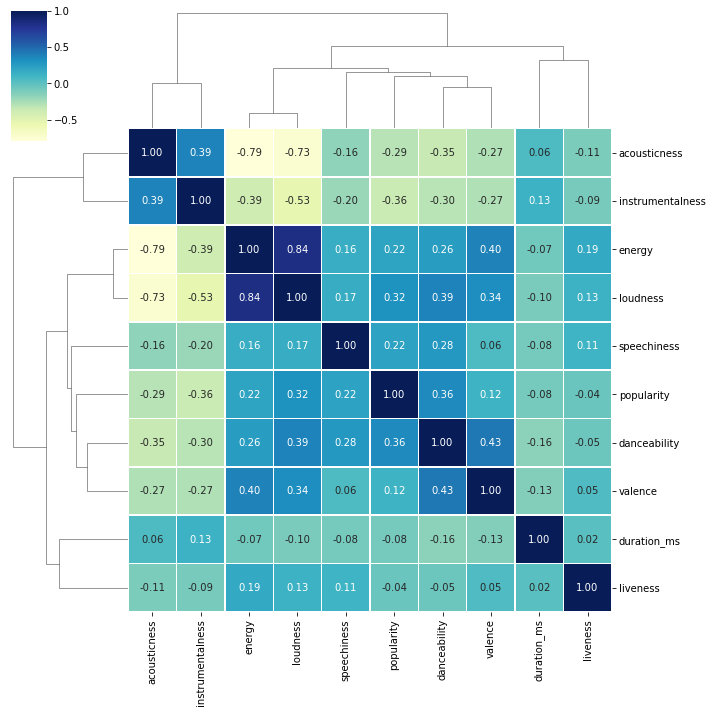

In [21]:
#chercher la correlation entre les variables de type float
corr_matrix=Xfloat.corr()
plt.figure(figsize=(15,10))
sns.clustermap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt=".2f",
           cmap="YlGnBu")

# Phase 3: preprocessing

In [22]:
df.head(10)["tempo"]

0               100.889
1    115.00200000000001
2               127.994
3               128.014
4               145.036
5                     ?
6               149.995
7               120.008
8    149.94799999999998
9               139.933
Name: tempo, dtype: object

In [23]:
df = df.drop(df[df["tempo"] == "?"].index)
df["tempo"] = df["tempo"].astype("float")

In [24]:
df = df.dropna(axis=0)
df.isnull().sum()

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["music_genre"] = le.fit_transform(df["music_genre"])
df["music_genre"]

0        5
1        5
2        5
3        5
4        5
        ..
50000    6
50001    6
50002    6
50003    6
50004    6
Name: music_genre, Length: 45020, dtype: int32

In [26]:
df["mode"] = df["mode"].map({"Minor": 0, "Major": 1})

In [27]:
df["key"] = le.fit_transform(df["key"])

In [ ]:
Y = df["music_genre"]
X = df[["popularity", "acousticness", "danceability","duration_ms","energy", "instrumentalness", "key", "liveness", "loudness", "mode", "speechiness", "tempo", "valence"]]

# Phase 4: machine learning

1.Train Test Split 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (36016, 13)
Test set: (9004, 13)


2. KNeighborsClassifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train, y_train)

print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))

train score: 0.9710406486006219
test score: 0.18103065304309196


In [12]:
from sklearn.metrics import accuracy_score
prediction = model.predict(X_test)
print("occuracy score : " , accuracy_score(y_test,prediction))


occuracy score :  0.1776988005330964


2.1 GridSearchCV

In [13]:
import numpy as np
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 10),
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)
print("best score : ",grid.best_score_)
print("best params : ",grid.best_params_)
model = grid.best_estimator_
print("best score : ",model.score(X_test, y_test))

best score :  0.19266440590219253
best params :  {'metric': 'manhattan', 'n_neighbors': 7}


0.19635717458907154